In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Julia/tut2`


## Control

In [2]:
using LinearAlgebra
using ForwardDiff: jacobian
using Plots

function newton_ls(f,x0;ε=1e-8)
    x1 = x0

    for n=1:100
        # Function evaluation and gradient
        f0 = f(x0)
        nf0 = norm(f0)
        G = jacobian(f,x0)

        # Update calculation (x̂ = x0 - x1)
        x̂1 = G\f0

        # Newton update with line search
        x1 = x0 - x̂1
        norm(f(x1))>nf0 ? x1 = linesearch(f,x0,nf0,-x̂1) : nothing
        norm(x1-x0)<ε ? (return x1, n) : x0 = x1
    end

    return x1, -1
end

function linesearch(f,x0,nf0,d)
    α = 1
    x1 = x0 + 1/(2^α)*d

    for n=1:10
        norm(f(x1)) < nf0 ? (return x1) : x1 = x0 + 1/(2^α)*d
        α += 1
    end

    return x1
end;

### 2.1

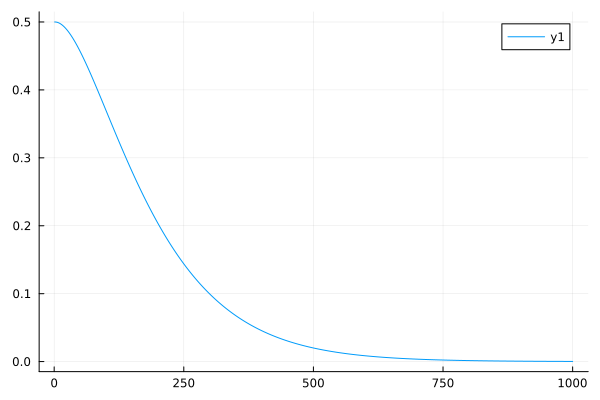

In [3]:
m = 1
k = 1
d = 2
g = 9.81

function dynamics(x,v,a)
    m*a+k*x+d*v
end

x = 0.5
v = 0
a = 0
dt = 0.01

n = 1000
xstore = zeros(n)

for i=1:n
    xstore[i] = x
    anew = newton_ls(a->[dynamics(x,v,a[1])],[a])[1][1]
    vnew = v + anew*dt
    xnew = x + v*dt
    
    x = xnew
    v = vnew
    a = anew
end

plot(xstore)

### 2.2 a)

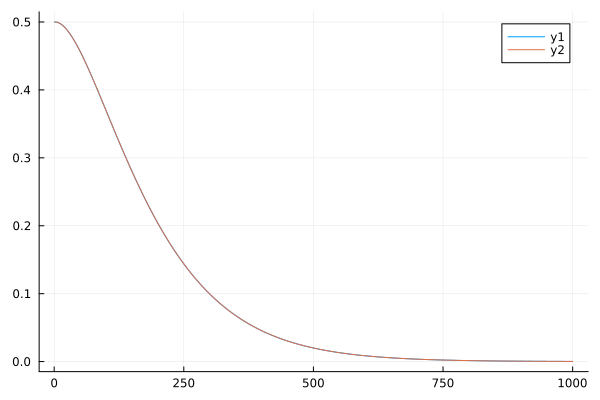

In [4]:
Kp = 1
Kd = 2

function dynamics(x,v,a)
    m*a+controller(x,v)
end

function controller(x,v)
    u = Kp*x + Kd*v
end

x = 0.5
v = 0
a = 0
dt = 0.01

n = 1000
xstore = zeros(n)

for i=1:n
    xstore[i] = x
    anew = newton_ls(a->[dynamics(x,v,a[1])],[a])[1][1]
    vnew = v + anew*dt
    xnew = x + v*dt
    
    x = xnew
    v = vnew
    a = anew
end

plot!(xstore)

### 2.2 b)

In [5]:
function lqr(A,B,Q,R)
    dt = 0.01
    A = A*dt + I
    B *= dt
    Q *= dt
    R *= dt

    P = Q
    K = zeros(size(R)[1],size(Q)[1])

    # Riccati Recurrsion

    for i=1:10000
        K = (R+B'*P*B)\B'*P*A
        Ā = A-B*K
        P = Q+K'*R*K+Ā'*P*Ā
    end

    return K
end;

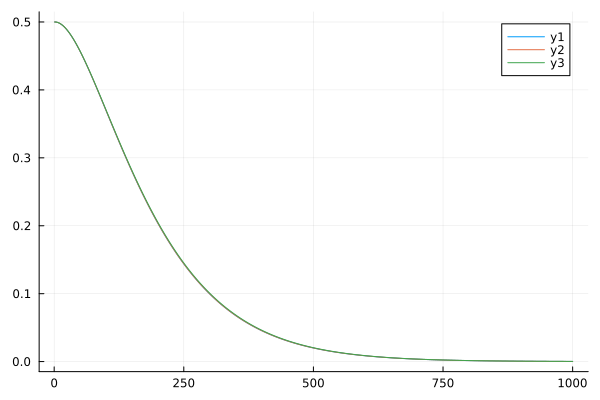

In [6]:
A = [
    0 1
    0 0
]

B = zeros(2,1)
B[1] = 0
B[2] = 1


Q = [
    1 0
    0 2
]

R = ones(1,1)

K = lqr(A,B,Q,R)

function dynamics(x,v,a)
    m*a+controller(x,v)[1]
end

function controller(x,v)
    u = K*[x;v]
end

x = 0.5
v = 0
a = 0
dt = 0.01

n = 1000
xstore = zeros(n)

for i=1:n
    xstore[i] = x
    anew = newton_ls(a->[dynamics(x,v,a[1])],[a])[1][1]
    vnew = v + anew*dt
    xnew = x + v*dt
    
    x = xnew
    v = vnew
    a = anew
end

plot!(xstore)